#Bike Sharing Multiple Linear Regression Assignment

##Below are stapes performed to complete the assignment:

#####1. Imported the libraries to perform the task related to the assignment.

#####2. Performed few steps to check the null value, shape and description of the dataset to understand it.

#####3. Performed Exploratory Data Analysis to understand the data better.

#####4. Created dummy variable for our categorical variables.

#####5. Splitting the Data into Training and Testing Sets

#####6. Building our Model using libraries sklearn RFE and Statsmodel API

#####7. Residual Analysis on train data

#####8. Looking for patterns in the residuals

#####9. Making Predictions on test set

#####10. Model Evaluation

#####11. Conclusion

###Project submitted by:

##Ramandeep Mehra

###Program name:

##Executive PG Programme in Machine Learning & AI - Dec 2023


In [1]:
# Importing important libraries to perform the task, calculation, data visualization and import the dataset for Multiple linear regression.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Readind the data and checking the first 5 Rows of the columns
data = pd.read_csv('day.csv')
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

### There are 730 rows and 16 columns in the dataset

# Checking the statistics value of the dataset

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Checking the null value and datatype of the dataset

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There are no null values in the dataset. Will go ahead and check the data type of the datset

In [6]:
data.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### casual  and registered  columns are explained by cnt column and has the sum of both the columns in cnt, to avoid the multicollinearity and minimum number of variable for the better accuracy, will drop these 2 variables.

###we are not using casual and registered in our pre-processed training data for model training. casual + registered = cnt. This might leak out the crucial information and model might get overfit.


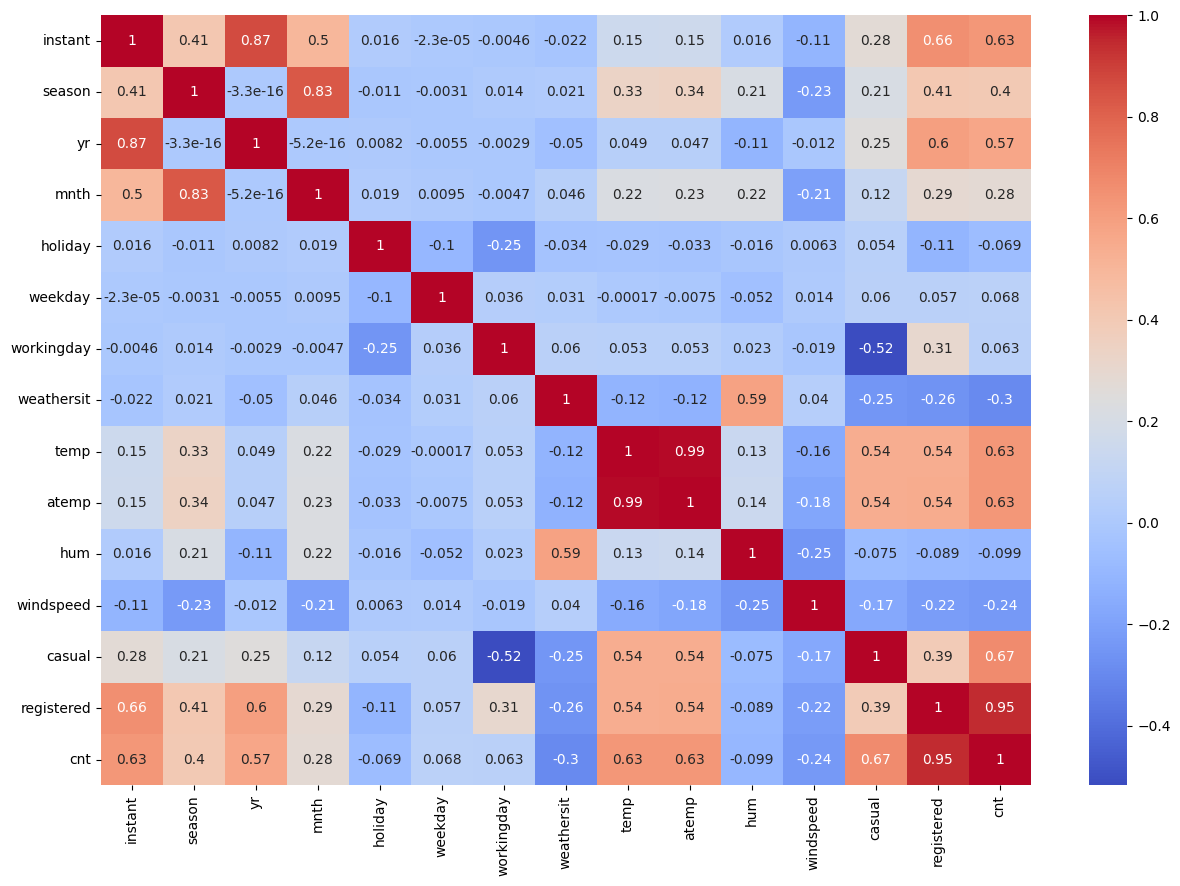

In [7]:
# Creating the heatmap to check the correlation between the variables before dropping
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [8]:
#dropping casual and registered columns

data.drop(['casual','registered'], axis=1,inplace=True)


In [9]:
#converting day of the week from 0-6 to sun-sat as this are number value and this needs to be coverted as a categorical variable and need to convert them into string.
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})
data[['weekday']]=data[['weekday']].apply(ass_weekdays)


In [10]:
#convereting the weather varible as 1,2,3,4 to clear, mist , snow , rainy.
def ass_weather(x):
    return x.map ({1:'clear', 2:'mist', 3:'snow', 4:'rainy'})
data[['weathersit']]=data[['weathersit']].apply(ass_weather)


In [11]:
#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
def ass_seasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
data['season']=data['season'].apply(ass_seasons)


In [12]:
# contverting mnth values from 1-12 to jan-dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

data[['mnth']]=data[['mnth']].apply(ass_mnth)


# Visualising the Data
### Now will check and understand the data using the seaborn and matplotlib to understand the data pattern and avoid multicollinearity, also the variables which are highly correlated. If one variable is explained by the another varible than will go ahead and drop those variables

In [13]:
#sns.pairplot(data)
#plt.show()
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

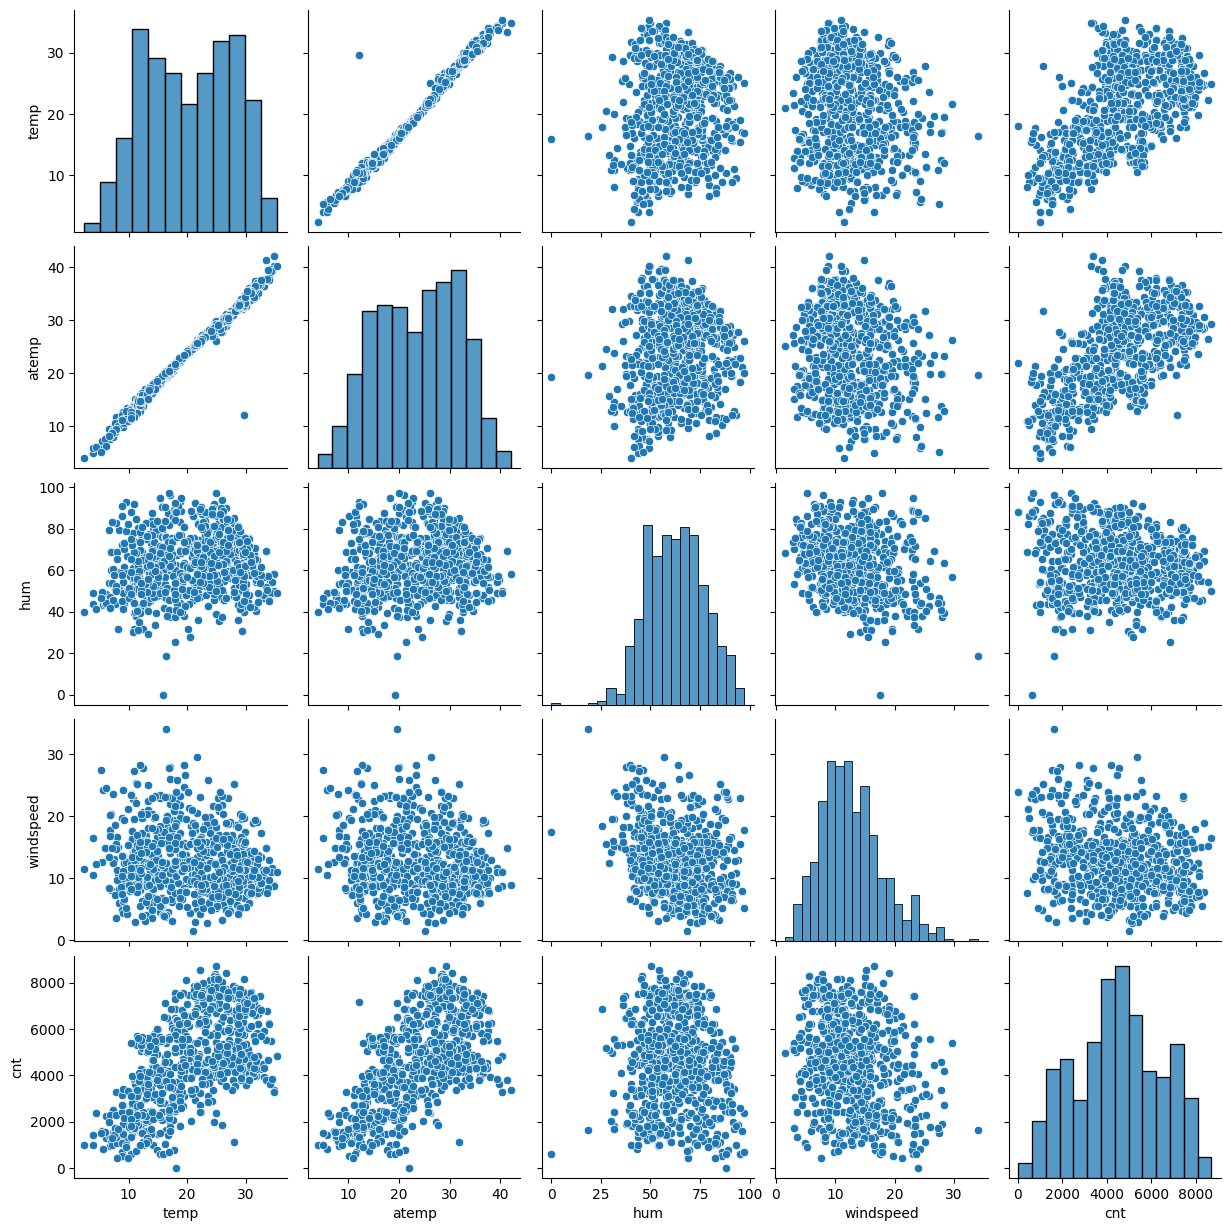

In [14]:
#creating pairplot to check the linear relationship
sns.pairplot(data[["temp","atemp","hum","windspeed","cnt"]])
plt.show()


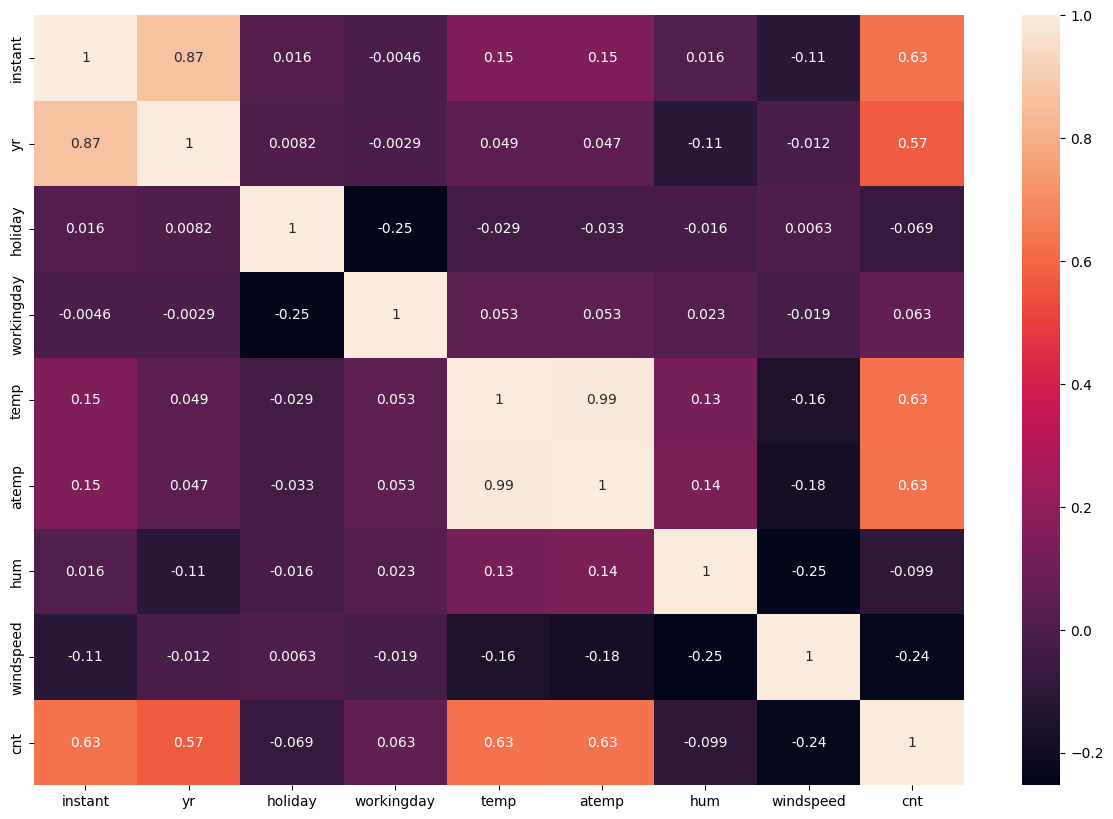

In [15]:
# Creating the heatmap to check the correlation between the variables after dropping and creating categorical value into string value.
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()


# Observation from the above heatmap:
###  temp vs atemp are highly correlated, will go ahead and drop one column.

### cnt is highly correlated with instant and this varible will not explain the target varible, hence will drop this variable as well.

### cnt is negatively correlated with windspeed followed by workingday.



In [16]:
data.drop('atemp',axis=1, inplace=True)
data.drop('instant',axis=1, inplace=True)


In [17]:
data.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


### dteday column is not required for model development point of view. Will go ahead and drop this column.

In [18]:
data.drop('dteday',axis=1, inplace=True)


In [19]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Visualizing Categorical Variables after creating the boxplot to check the target variable on Y axis which is cnt and categorical variable on X axis.

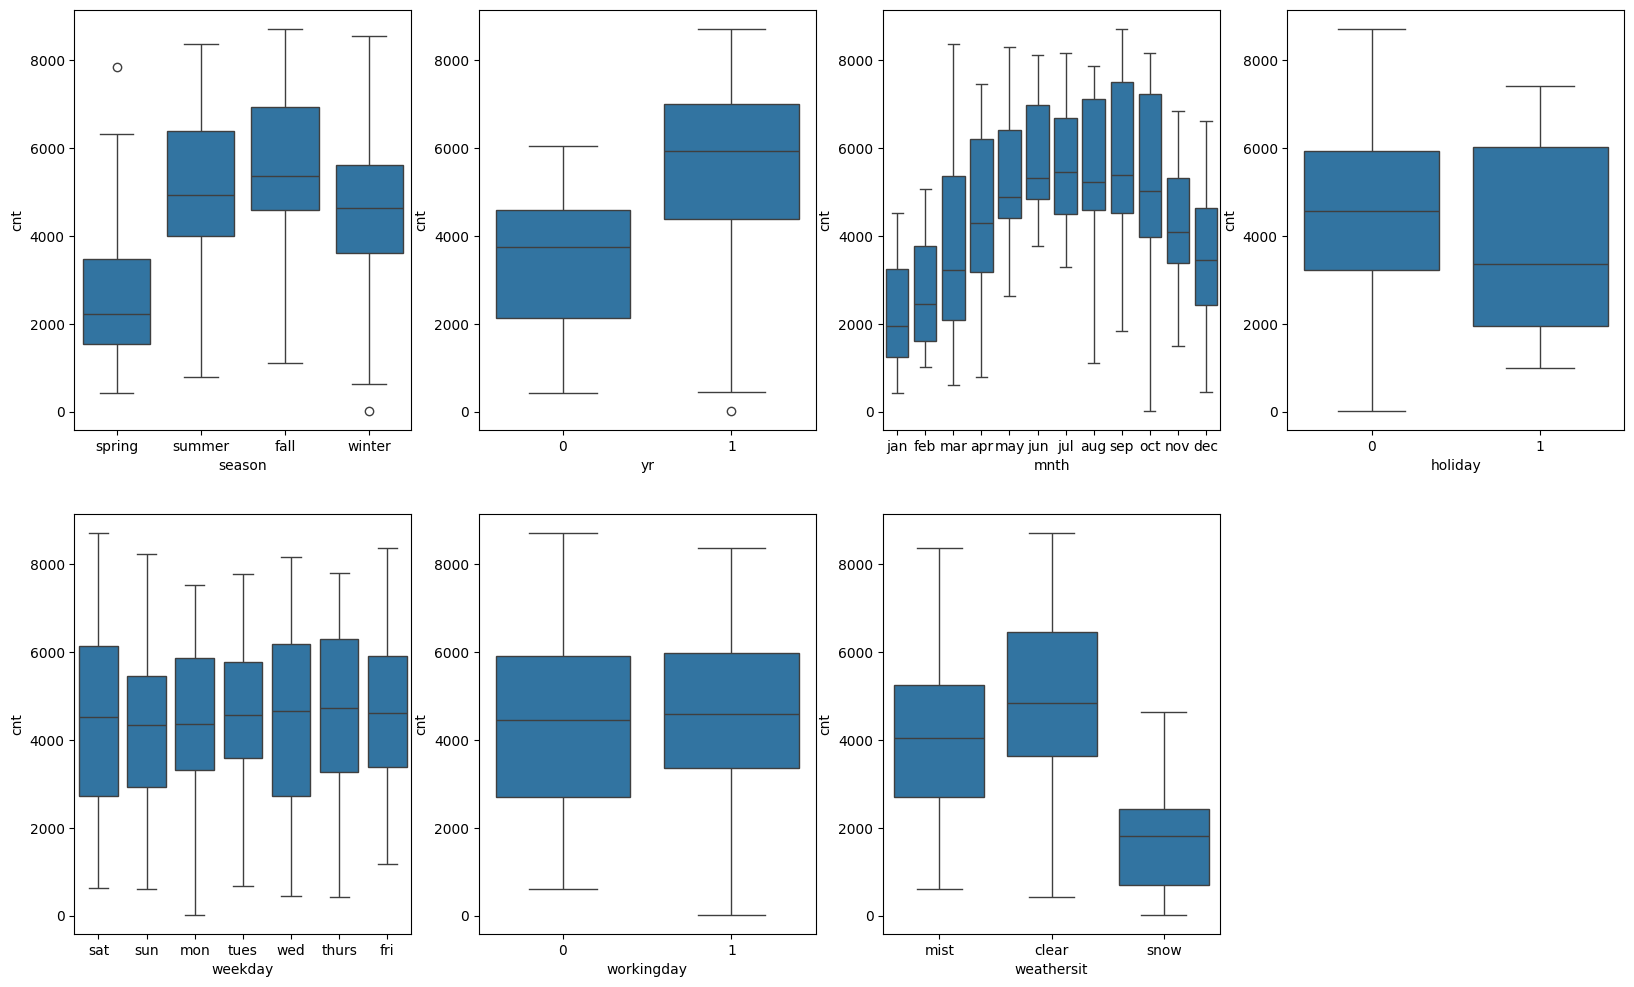

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

#Observation:

#####1. In fall season there is hike in demand followed by summer season.

#####2. As we can see in the boxplot, there is hike in demand in the year of 2019.

#####3. Median value for cnt is gradually increasing till July month and there is significant drop in the month of aug, and than the median value for cnt decreased by the month.

#####4. Median value for cnt for holiday variable 0 is higher than the 1.

#####5. weekday is not showing any inconsistency over the week.

#####6. workingday is not showing any inconsistency.

#####7. In cnt, there is increase in demand during the clear weather and we can clearly see a drop in demand in the snow weather.

##Will go ahead and check the distribution of the data.

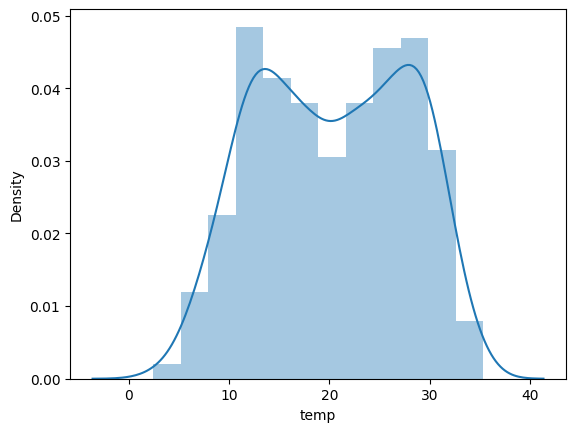

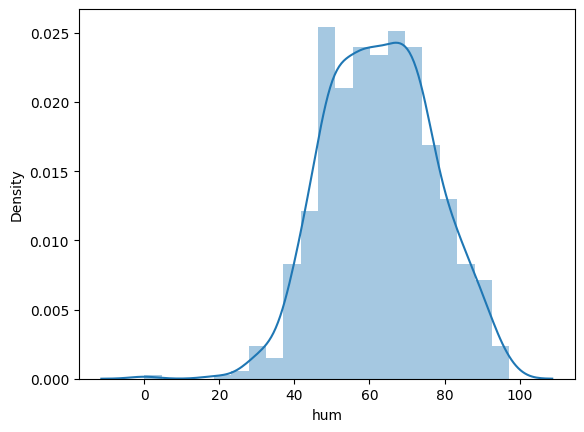

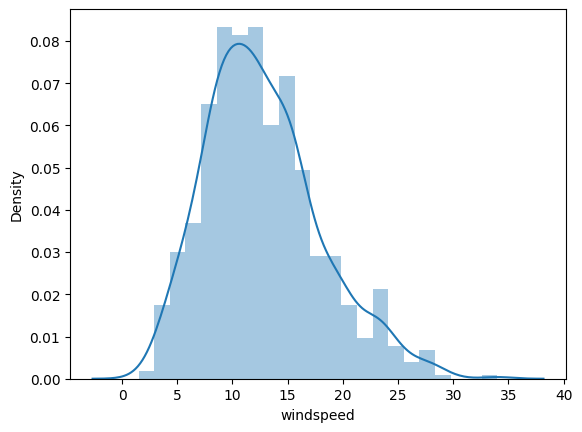

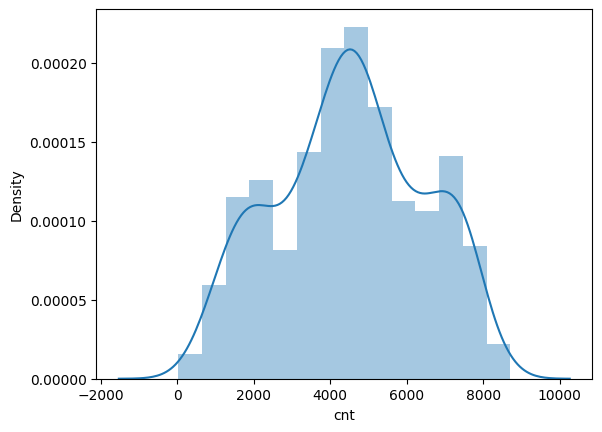

In [21]:
sns.distplot(data['temp'])
plt.show();
sns.distplot(data['hum'])
plt.show();
sns.distplot(data['windspeed'])
plt.show();
sns.distplot(data['cnt'])
plt.show();

# Preparing the Data for Modeling.

In [22]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Creating dummies variable for our categorical variables.

In [23]:
#Getting the dummy variable for the season column

season_dummy_var = pd.get_dummies(data["season"], drop_first = True)
season_dummy_var.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
#Getting the dummy variable for the weathersit column

weathersit_dummy_var = pd.get_dummies(data["weathersit"],drop_first = True)
weathersit_dummy_var.head()



,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [25]:
#Getting the dummy variable for the mnth column

mnth_dummy_var = pd.get_dummies(data["mnth"],drop_first = True)
mnth_dummy_var.head()


,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# Getting dummy variable for the weekday column
weekday_dummy_var = pd.get_dummies(data["weekday"],drop_first = True)
weekday_dummy_var.head()


,mon,sat,sun,thurs,tues,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [27]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

In [28]:
#Dropping these columns from the data
data.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace=True)


In [29]:
#Concatenating dummy variable with the dataset
data = pd.concat([data, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,mist,snow,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


#Splitting the data into train set and test set

In [30]:
#Splitting the data into 70:30, and setting up the random state as 100 for the same result.
data_train , data_test = train_test_split(data, train_size=0.7, test_size = 0.3,random_state=100)


In [31]:
print(data_train.shape)
print(data_test.shape)

(510, 29)
(219, 29)


# Rescalling the variable using MinMax Scalling method

In [32]:
# Apply scaler funtion to all the columns except the '0, 1 and dummy' variables to have the authenticity of the variable.
scaler= MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
data_train[num_vars]=scaler.fit_transform(data_train[num_vars])
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,mist,snow,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
#Validating the data also if the variable has beens scaled from 0 to 1 after using the MinMax method.
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,mist,snow,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Excluding the target varible from the dataset for model building.


In [34]:
y_train= data_train.pop('cnt')
X_train=data_train

###This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



In [35]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('aug', False, 14),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 9),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thurs', False, 10),
 ('tues', False, 8),
 ('wed', False, 12)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'mist', 'snow', 'jan', 'jul', 'sep', 'sat', 'sun'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]


Index(['summer', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'thurs', 'tues', 'wed'],
      dtype='object')

In [39]:
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [40]:
# Building model using statsmodel, for the detailed statistics analysis

X_train_rfe = X_train[col]


In [41]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.03e-190
Time:                        17:57:01   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

## Observation from the lm stat summary:

#####1. Post checking the P-value for holiday, it seems that variable is insignificant and have to check the VIF value before dropping

#####2. A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Will go ahead and check that:

In [44]:
calculate_VIF(col,X_train)


,Features,VIF
2,workingday,41.60
13,sat,10.14
14,sun,9.82
3,temp,3.19
6,spring,2.72
1,holiday,2.58
4,hum,1.90
7,winter,1.81
8,mist,1.57
10,jan,1.55


### As we can see that workingday has the high VIF value, will go ahead and drop this variable first to avoid multicollinearity and will check if holiday variable's value will become significant for the model.

# Creating Model 2 after droping workingday


In [45]:
X_train_new = X_train[col].drop(["workingday"], axis = 1) # dropping workingday variable


In [46]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)


In [47]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model


In [48]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.03e-190
Time:                        17:57:01   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3468      0.031     11.145      0.0

In [49]:
calculate_VIF(X_train_new.columns,X_train_new)


,Features,VIF
3,hum,23.53
2,temp,15.95
4,windspeed,4.07
5,spring,2.91
7,mist,2.25
6,winter,2.12
0,yr,2.07
9,jan,1.67
10,jul,1.41
12,sat,1.23


### 'hum' variable has the highest VIF, will go ahead and remove this

# Creating Model 3 after droping hum.


In [50]:
X_train_new = X_train_new.drop(["hum"], axis = 1) # dropping "hum" variable


In [51]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [52]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model


In [53]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          3.12e-188
Time:                        17:57:02   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2717      0.024     11.191      0.0

In [54]:
calculate_VIF(X_train_new.columns,X_train_new)


,Features,VIF
2,temp,4.75
3,windspeed,4.05
4,spring,2.27
0,yr,2.06
8,jan,1.60
6,mist,1.53
5,winter,1.43
9,jul,1.36
11,sat,1.23
12,sun,1.21


##Dropping "sat" variable because it has p-value greater than 0.05

## Creating Model 4 after droping hum.

In [55]:
X_train_new = X_train_new.drop(["sat"], axis = 1) # dropping "sat" variable


In [56]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [57]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the 4th linear model

In [58]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          3.50e-189
Time:                        17:57:02   Log-Likelihood:                 506.36
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     497   BIC:                            -931.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2739      0.024     11.321      0.0

In [59]:
calculate_VIF(X_train_new.columns,X_train_new)


,Features,VIF
2,temp,4.69
3,windspeed,4.01
4,spring,2.26
0,yr,2.06
8,jan,1.60
6,mist,1.53
5,winter,1.42
9,jul,1.36
10,sep,1.20
11,sun,1.18


## lm_4 model will be our final model as it has all the VIF value below 5 and P-value below 0.05, also R-squared: 0.840 and Adj. R-squared:0.836. Will go ahead and peroform the Residual Analysis of the training data.

In [60]:
#Residual Analysis of the training data

y_train_cnt = lm_4.predict(X_train_lm)


In [61]:
## Looking at the RMSE and Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.08965451249899344

Text(0.5, 0, 'Errors')

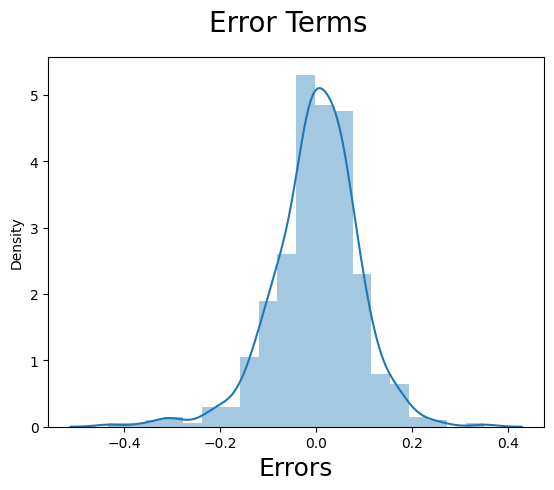

In [62]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

### The residuals are following the normally distributed Curve with a mean 0 and maximum data point are distributed around the 0.

# Model Evaluation


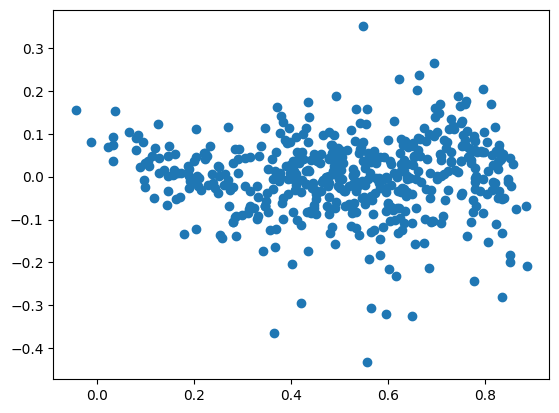

In [63]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

### From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

# We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.


# Making Predictions

### Applying the scaling on the test sets


In [64]:
# Apply scaler() to all the columns except the '0,1' and 'dummy' variables
num_vars = ["temp", "hum", "windspeed", "cnt"]

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [65]:
# Checking the MinMax scaling
data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,mist,snow,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X_test and y_test


In [66]:
y_test = data_test.pop('cnt')
X_test = data_test

In [67]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

#Model Evaluation

Text(0, 0.5, 'y_pred')

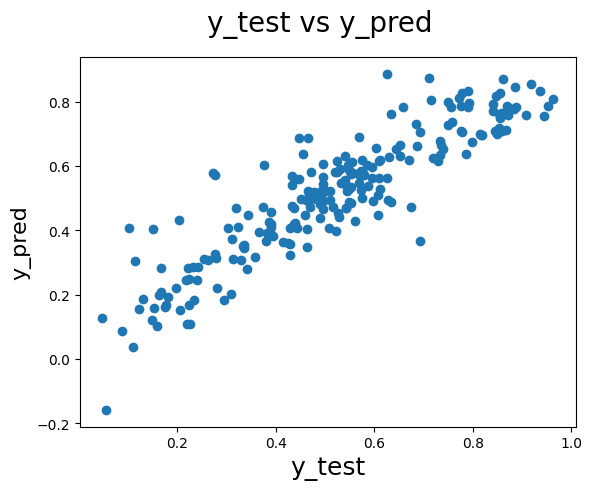

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Looking at the RMSE


In [70]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09600899659016959

In [71]:
R2 = r2_score(y_test, y_pred)
R2

0.8059254535245506

In [72]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7946201401376312

## As per the final model, the R-Squared value of the model is 0.8059254535245506 and Adjusted R-Squared value of the model is 0.7946201401376312.

In [73]:
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          3.50e-189
Time:                        17:57:04   Log-Likelihood:                 506.36
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     497   BIC:                            -931.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2739      0.024     11.321      0.0

##Finally we can conclude that the best fit line of the model would be:

#cnt = 0.2717 + 0.2348 * yr - 0.1054 * holiday + 0.4318 * temp  - 0.1482 * windspeed - 0.1006 * spring + 0.0453 * winter - 0.0821 * mist - 0.293 * snow - 0.0436 * jan - 0.0668 * jul + 0.0574 * sep - 0.042 * sun

In [74]:
summary_final_model = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.840,0.836,0.08965],
                         "Test Set":[0.805,0.795,0.0960]})
print(summary_final_model)

  Model Performance Metrics  Train Set  Test Set
0           R-Squared Value    0.84000     0.805
1  Adjusted R-Squared Value    0.83600     0.795
2                      RMSE    0.08965     0.096


##Interpretation of Coefficients:

###1. yr: As we can see that year has positive relation of coeff 0.2348 between cnt, which indicates a good sales in 2018 & 2019.

###2. holiday: A coeff of -0.1054 tells us that if there is a holiday, the demand will be decreased.

###3. temp: A coeff of 0.4318 is helping us to determined a postive correlation.

###4. windspeed: windspeed shows a negative coeff.of 0.1006 sales drops in windy weather.

###5. season: We have concidered spring and winter seasons in our model where spring shows a negative coeff and winter shows a posiive coeff. As we can see sales goes up in winters and drops in spring.

###6. month : In the mon of jan, jul the sales show a negative difference wherein in the month of sept it is showing a positive relationship with demand of the bikes.

###7. week day : As we can see here on sun the demand is dropping as coeff value is negative.

###8. weather situation: Neither snow weather nor mist weather is showing a positive coeff.

##Conclusion:

###1. Company can continue with the stratergy used in 2019.

###2. There should be special offer discount on holidays for public to use bikes over other sevices.

###3. windspeed is a factor which can't be controlled by the comapny, so they can think another possible way to overcome this issue.

###4. They can offer coupons in spring season to encourage public to use bikes.

###5. Rainy weather is the most affecting weather for the comapny as people avoid going out on bikes in rainy season.
